## STA 141A: Assignment 4
### Yunwei Huang 922023819


## Question 1 

Generate 3 clusters in a two-dimensional space by sampling from bivariate normal distributions, for $k=1,2,3$,  
$$(x, y) \sim N(\mu_k, I_2),$$
where $\{\mu_k\}$ are two-dimensional vectors of your choice.

1. Generate 50 points in each cluster.
2. Draw a scatterplot of the unlabeled points.
3. Apply K-means with $K = 3$.
4. Add the resulting cluster assignments and cluster centers to your scatterplot


In [1]:
set.seed(141)

library(tidyverse)
library(cluster)
library(patchwork)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.5     ✔ tidyr     1.3.2
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## [1] 1

In [11]:
new_per_cluster <- 50
sd_per_cluster <- 1

point_df <- tibble(
  x = c(rnorm(new_per_cluster, mean = 0,  sd = sd_per_cluster),
        rnorm(new_per_cluster, mean = 3,  sd = sd_per_cluster),
        rnorm(new_per_cluster, mean = -3, sd = sd_per_cluster)),
  y = c(rnorm(new_per_cluster, mean = 0,  sd = sd_per_cluster),
        rnorm(new_per_cluster, mean = 3,  sd = sd_per_cluster),
        rnorm(new_per_cluster, mean = 3,  sd = sd_per_cluster))
)

head(point_df)

x,y
<dbl>,<dbl>
0.2405546,1.32065473
-1.3481415,0.03305718
-0.3324169,2.14556648
-0.8251996,-1.85530291
1.4850631,-0.49964053
-0.7457914,-1.06707385


## [1] 2

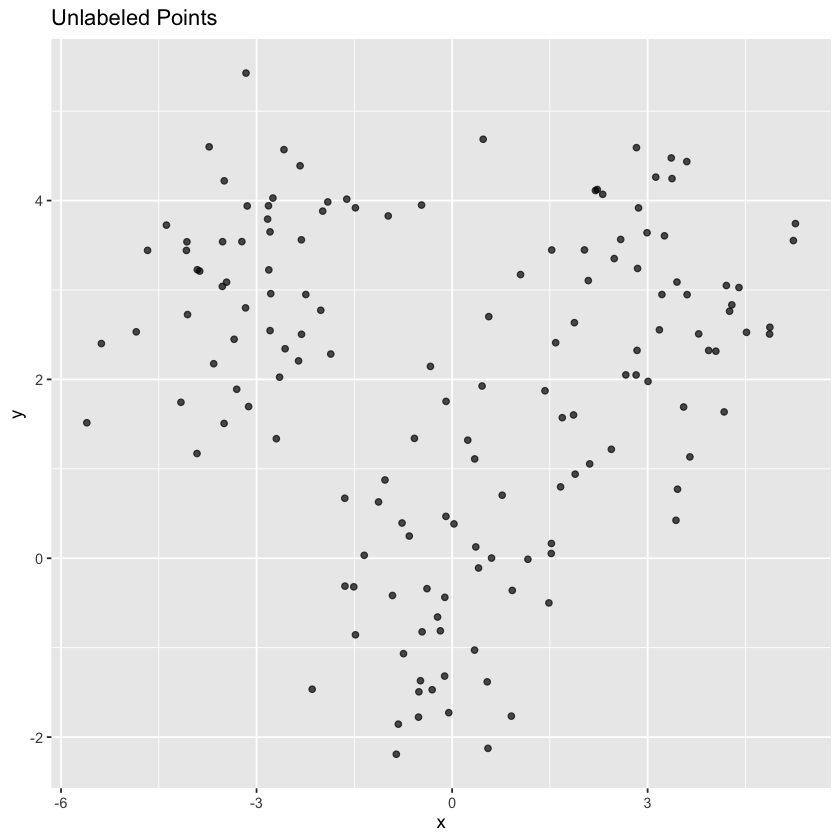

In [12]:
ggplot(point_df, aes(x = x, y = y)) +
  geom_point(alpha = 0.7) +
  labs(title = "Unlabeled Points", x = "x", y = "y")

## [1] 3

In [14]:
k_means <- kmeans(point_df, centers = 3, nstart = 20)
k_means

K-means clustering with 3 clusters of sizes 50, 53, 47

Cluster means:
           x          y
1 -3.0847844  3.1051251
2  3.0079164  2.8083799
3 -0.1553492 -0.2730846

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 2 3 3 3 3 3 3 3 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

Within cluster sum of squares by cluster:
[1]  97.30904 125.07224  94.01301
 (between_SS / total_SS =  80.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

## [1] 4

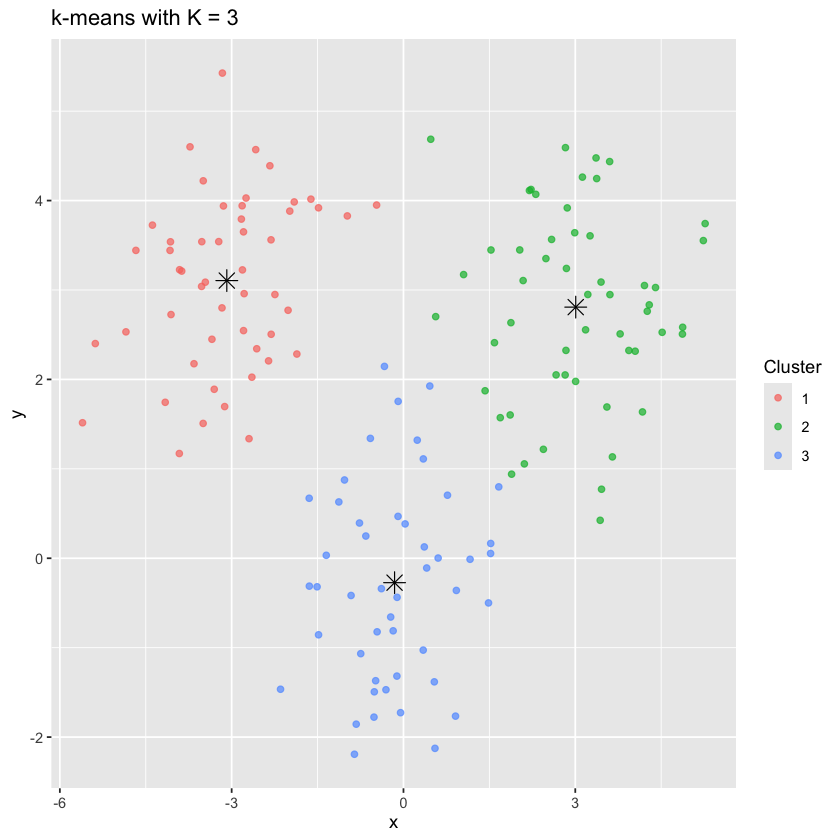

In [16]:
toy_df_k3 <- point_df |>
  mutate(cluster = factor(k_means$cluster))

ggplot(toy_df_k3, aes(x = x, y = y, color = cluster)) +
  geom_point(alpha = 0.7) +
  geom_point(data = as_tibble(k_means$centers),
             aes(x = x, y = y),
             size = 4, shape = 8,
             inherit.aes = FALSE) +
  labs(title = "k-means with K = 3", color = "Cluster")

## Question 2 

Consider the `USArrests` dataset in `R`.

1. Convert `USArrests` into a tibble with a `State` column.
2. Run K-means with $K = 4$ on the raw variables.
3. Run K-means with $K = 4$ on scaled variables (use `scale()`).
4. Compare the two cluster assignments using tables or plots.
5. Explain whether scaling is necessary or not in this case.


In [18]:
# 2
set.seed(141)

library(tidyverse)
library(cluster)
library(patchwork)

## [2] 1

In [20]:
 arrests <- USArrests |>
   as_tibble(rownames = "State")
 head(arrests)

State,Murder,Assault,UrbanPop,Rape
<chr>,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


## [2] 2

In [29]:
set.seed(141)
k_fit <- kmeans(arrests |> select(-State), centers = 4)
k_fit

K-means clustering with 4 clusters of sizes 10, 14, 16, 10

Cluster means:
     Murder  Assault UrbanPop     Rape
1  5.590000 112.4000 65.60000 17.27000
2  8.214286 173.2857 70.64286 22.84286
3 11.812500 272.5625 68.31250 28.37500
4  2.950000  62.7000 53.90000 11.51000

Clustering vector:
 [1] 3 3 3 2 3 2 1 3 3 2 4 1 3 1 4 1 1 3 4 3 2 3 4 3 2 1 1 3 4 2 3 3 3 4 1 2 2 1
[39] 2 3 4 2 2 1 4 2 2 4 4 2

Within cluster sum of squares by cluster:
[1]  1480.210  9136.643 19563.863  4547.914
 (between_SS / total_SS =  90.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

## [2] 3

In [31]:
set.seed(141)

k_fit_scaled <- kmeans(scale(arrests |> select(-State)), 
                       centers = 4, 
                       nstart = 25)

k_fit_scaled

K-means clustering with 4 clusters of sizes 16, 8, 13, 13

Cluster means:
      Murder    Assault   UrbanPop        Rape
1 -0.4894375 -0.3826001  0.5758298 -0.26165379
2  1.4118898  0.8743346 -0.8145211  0.01927104
3  0.6950701  1.0394414  0.7226370  1.27693964
4 -0.9615407 -1.1066010 -0.9301069 -0.96676331

Clustering vector:
 [1] 2 3 3 2 3 3 1 1 3 2 1 4 3 1 4 1 4 2 4 3 1 3 4 2 3 4 4 3 4 1 3 3 2 4 1 1 1 1
[39] 1 2 4 2 3 1 4 1 1 4 4 1

Within cluster sum of squares by cluster:
[1] 16.212213  8.316061 19.922437 11.952463
 (between_SS / total_SS =  71.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

## [2] 4

In [33]:
arrests_comparison <- arrests |>
  mutate(
    cluster_raw = factor(k_fit$cluster),        
    cluster_scaled = factor(k_fit_scaled$cluster) 
  )

head(arrests_comparison)

State,Murder,Assault,UrbanPop,Rape,cluster_raw,cluster_scaled
<chr>,<dbl>,<int>,<int>,<dbl>,<fct>,<fct>
Alabama,13.2,236,58,21.2,3,2
Alaska,10.0,263,48,44.5,3,3
Arizona,8.1,294,80,31.0,3,3
Arkansas,8.8,190,50,19.5,2,2
California,9.0,276,91,40.6,3,3
Colorado,7.9,204,78,38.7,2,3


## [2] 5

## Question 3

Consider the `USAarrests` data again, with scaled variables.


1. Run K-means with `nstart = 20` for $K = 1, 2, \dots, 10$.
2. Extract the total within-cluster sum of squares (`tot.withinss`).
3. Make an elbow plot of `tot.withinss` versus K.
4. Report a reasonable value of $K$ and justify your choice.


## [3] 1 2

In [39]:
set.seed(141)
library(tidyverse)
arrests_scaled <- scale(arrests |> select(-State))
 k_values <- 1:10
 k_results <- tibble(
   K = k_values,
   tot_withinss = purrr::map_dbl(k_values, ~{
     k_fit <- kmeans(arrests_scaled, centers = .x, nstart = 20)
     k_fit$tot.withinss
   })
 )
k_results

K,tot_withinss
<int>,<dbl>
1,196.00000
2,102.86240
3,78.32327
4,56.40317
5,48.94420
6,42.83303
7,38.68404
8,34.10865
9,29.86789


## [3] 3

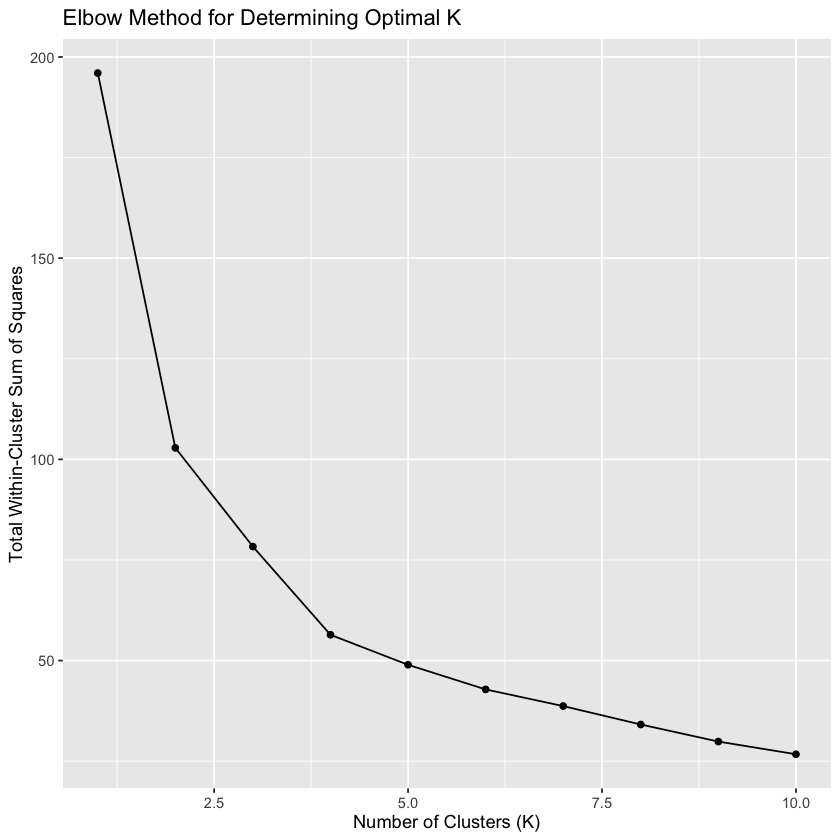

In [40]:
ggplot(k_results, aes(x = K, y = tot_withinss)) +
  geom_line() +
  geom_point() +
  labs(title = "Elbow Method for Determining Optimal K",
       x = "Number of Clusters (K)",
       y = "Total Within-Cluster Sum of Squares")

## [3] 4

## Question 4

Using the scaled `USArrests` dataset again.

1. Compute a distance matrix using Euclidean distance.
2. Perform hierarchical clustering with complete linkage.
3. Plot the dendrogram of the clustering result.
4. Cut the dendrogram into 4 clusters and compare these to the K-means clusters on scaled data.



## [4] 1 2 3 4 

State,Murder,Assault,UrbanPop,Rape
<chr>,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


          kmeans_cluster
hc_cluster  1  2  3  4
         1  0  7  1  0
         2  0  0 11  0
         3 16  1  1  3
         4  0  0  0 10

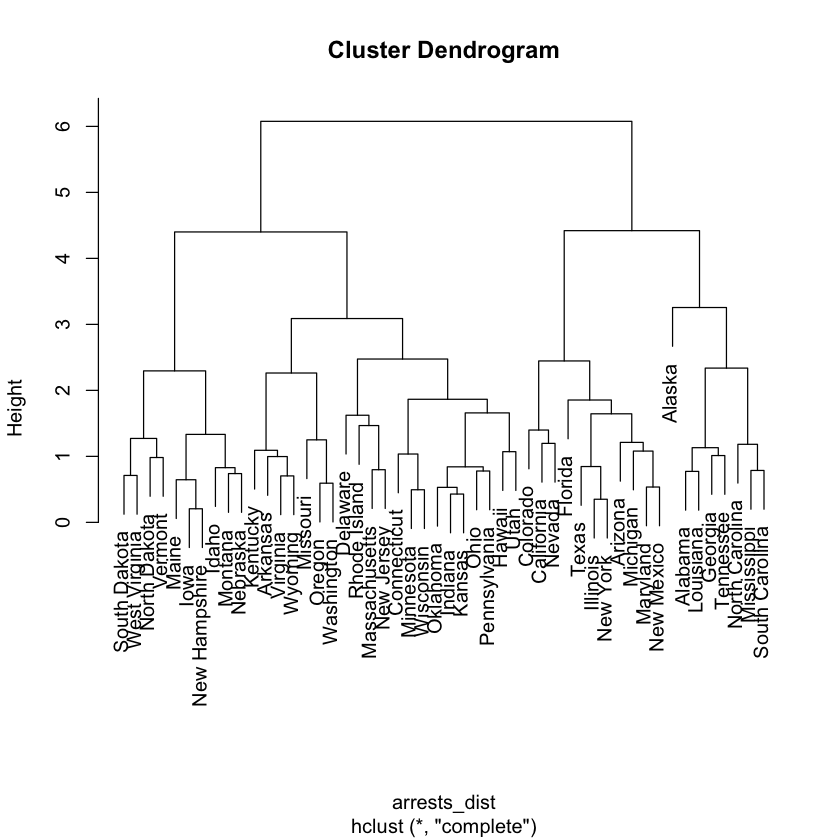

In [47]:
arrests <- USArrests |>
    as_tibble(rownames = "State")
    head(arrests)

arrests_scaled <- scale(arrests |> select(-State))

set.seed(141)
arrests_k <- kmeans(arrests_scaled, centers = 4, nstart = 25)
arrests_scaled <- scale(arrests |> select(-State))

arrests_dist <- dist(arrests_scaled, method = "euclidean")

arrests_hc <- hclust(arrests_dist, method = "complete")


plot(arrests_hc, labels = arrests$State)

hc_clusters <- cutree(arrests_hc, k = 4)

table(hc_cluster = hc_clusters, kmeans_cluster = arrests_k$cluster)

In [23]:
# 5
set.seed(141)

library(tidyverse)
library(cluster)
library(patchwork)

## Question 5

Using the scaled `USArrests` data again.

1. For each $K = 2, \dots, 8$, run k-means with `nstart = 20`.
2. For each K, compute the average silhouette score using the `silhouette()` function
   from the `cluster` package.
3. Plot the average silhouette score versus K.
4. Which K maximizes the average silhouette width? Compare this choice to your elbow-plot choice and explain any differences.

## [5] 1 2

In [49]:
 set.seed(141)
 new_k_values <- 2:8
 new_k_results <- tibble(
   K = new_k_values,
   tot_withinss = purrr::map_dbl(new_k_values, ~{
     k_fit <- kmeans(arrests_scaled, centers = .x, nstart = 20)
     silhouette_score <- silhouette(k_fit$cluster, dist(arrests_scaled))
     mean(silhouette_score[, 3])
   }))
new_k_results

K,tot_withinss
<int>,<dbl>
2,0.4084890
3,0.3094312
4,0.3396889
5,0.3030781
6,0.2859821
7,0.2889692
8,0.2624851


## [5] 3

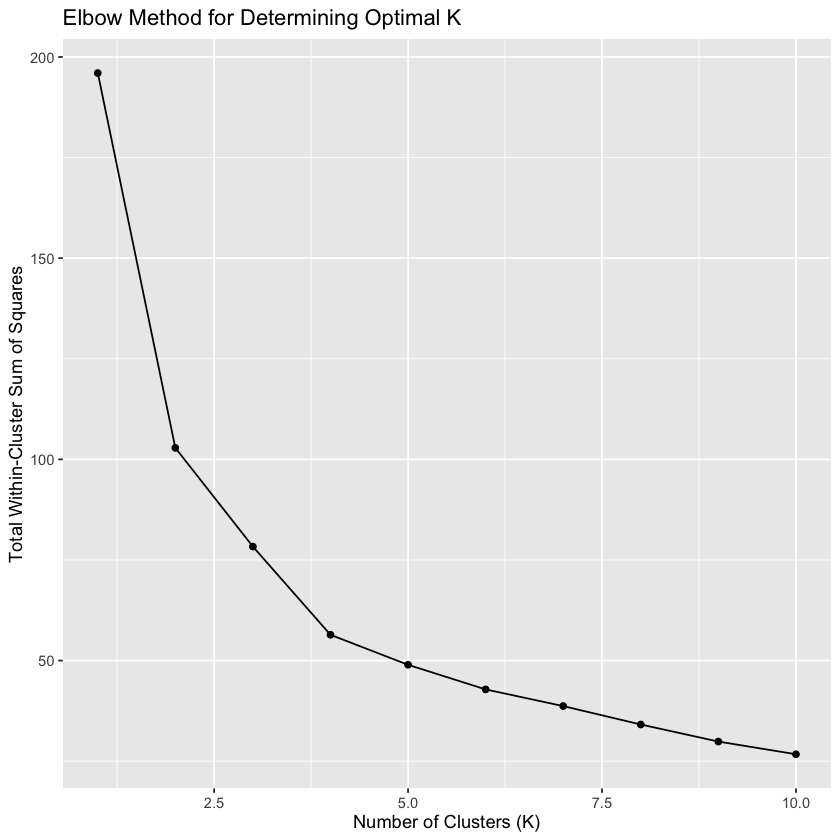

In [50]:
ggplot(k_results, aes(x = K, y = tot_withinss)) +
  geom_line() +
  geom_point() +
  labs(title = "Elbow Method for Determining Optimal K",
       x = "Number of Clusters (K)",
       y = "Total Within-Cluster Sum of Squares")

## [5] 4